In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import os

In [ ]:
from tqdm import tqdm

In [ ]:
dirs = os.listdir('/content/drive/MyDrive')

In [ ]:

for file in tqdm(dirs):
  if file == 'Colab Notebooks':
    continue
  os.remove(file)

100%|██████████| 1/1 [00:00<00:00, 5777.28it/s]


In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
!wget https://f000.backblazeb2.com/file/malay-dataset/speech/semisupervised-malay-part3.tar.gz

--2021-09-27 02:57:37--  https://f000.backblazeb2.com/file/malay-dataset/speech/semisupervised-malay-part3.tar.gz
Resolving f000.backblazeb2.com (f000.backblazeb2.com)... 104.153.233.177
Connecting to f000.backblazeb2.com (f000.backblazeb2.com)|104.153.233.177|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 7008307200 (6.5G) [application/octet-stream]
Saving to: ‘semisupervised-malay-part3.tar.gz’

semisupervised-mala 100%[===================>]   6.53G  43.0MB/s    in 3m 25s  

2021-09-27 03:01:03 (32.7 MB/s) - ‘semisupervised-malay-part3.tar.gz’ saved [7008307200/7008307200]



In [ ]:
!tar xf /content/sample_data/semisupervised-malay-part3.tar.gz -C /content/drive/MyDrive/Data

In [ ]:
import soundfile as sf
import pandas as pd
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import re
import IPython.display as ipd
import numpy as np
import os
import shutil
from tqdm import tqdm

In [11]:
%cd /content/drive/MyDrive/Data/combined/

/content/drive/MyDrive/Data/combined


In [5]:
text_dir = "output-text"
wav_dir = "output-wav"
 
text_lst = os.listdir(text_dir)
wav_lst = os.listdir(wav_dir)
 
count_txt = len(text_lst)
count_wav = len(wav_lst)
 
c = 0
dst_txt_lst = []
dst_wav_lst = []
 
if count_txt == count_wav:
    for i in tqdm(range(count_txt)):
        
        txt_file = text_lst[i].split('.wav.txt')[0]
        #wav_file = wav_lst[i].split('.wav')[0]
        if txt_file == '.ipynb_checkpoints':
          continue
        prefix_ = f"f3wav{i:05}"
        src_txt = f"{text_dir}/{text_lst[i]}"
        #src_wav = f"{wav_dir}/{wav_lst[i]}"
        dst_txt = f"{text_dir}/{prefix_}.txt"
        dst_wav = f"{wav_dir}/{prefix_}.wav"
 
        if not os.path.exists(dst_txt) and not os.path.exists(dst_wav):
          if os.path.exists(wav_dir+"/"+txt_file+".wav"):
            os.rename(src_txt, dst_txt)
            os.rename(wav_dir+"/"+txt_file+".wav", dst_wav)
            print(dst_txt, dst_wav)

        with open(dst_txt, 'r') as f:
            lines = " ".join(f.readlines())
            dst_txt_lst.append(lines)
        dst_wav_lst.append(dst_wav)
        c += 1
else:
    print("Failed")
print(c)
if len(dst_txt_lst) == len(dst_wav_lst):
    sub_df = pd.DataFrame(data={'path': dst_wav_lst, 'transcript': dst_txt_lst})
    sub_df.to_csv('submission.csv', index=False)
else:
    print("Failed")

100%|██████████| 36255/36255 [00:32<00:00, 1098.98it/s]


36255


In [10]:
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\$\'\&]'
pattern = re.compile(chars_to_ignore_regex)
  
def check_sgn(txt):
  return re.search(pattern, txt)
def has_digit(inputString):
  return re.search(r'\d', inputString)

In [13]:
data_csv = pd.read_csv('submission.csv')

In [15]:
data_dict = []
check_type = np.int16(5)
for i in range (len(data_csv)):
  if i%1000 ==0:
    print('index:',i)
  sample_dict = {}
  sample = data_csv.iloc[i]['path']
  text = data_csv.iloc[i]['transcript']
  count_word = 0
  if len(text) >0:
    count_word = text.count(' ')+1
  id = i
  sample_name = sample
  sampling_rate,  sampling_data = wavfile.read(sample)
  audio_duration = round(len(sampling_data)/float(sampling_rate),2)

  audio_size = 0
  if type(sampling_data[0]) == type(check_type):
    audio_size = (len(sampling_data)*16/8)//1000
  wav_format = type(sampling_data[0])
  text_size = len(text)
  check_digit = 0
  if has_digit(text) is not None:
    check_digit = 1
  check_symbol = 0
  if check_sgn(text) is not None:
    check_symbol = 1
  sample_dict['ID'] = i
  sample_dict['sample_name'] = sample_name
  sample_dict['audio_size'] = audio_size
  sample_dict['audio_array_size'] = len(sampling_data)
  sample_dict['audio_duration'] = audio_duration
  sample_dict['audio_sampling_rate'] = sampling_rate
  sample_dict['wav_format'] = str(wav_format)
  sample_dict['text_size'] = text_size
  sample_dict['text_transcript'] = text
  sample_dict['count_word'] = count_word
  sample_dict['text_check_digit'] = check_digit
  sample_dict['text_check_symbol']  = check_symbol
  data_dict.append(sample_dict)

index: 0
index: 1000
index: 2000
index: 3000
index: 4000
index: 5000
index: 6000
index: 7000
index: 8000
index: 9000
index: 10000
index: 11000
index: 12000
index: 13000
index: 14000
index: 15000
index: 16000
index: 17000
index: 18000
index: 19000
index: 20000
index: 21000
index: 22000
index: 23000
index: 24000
index: 25000
index: 26000
index: 27000
index: 28000
index: 29000
index: 30000
index: 31000
index: 32000
index: 33000
index: 34000
index: 35000
index: 36000


In [16]:
df = pd.DataFrame({'ID':[i['ID'] for i in data_dict],
                  'sample_name': [i['sample_name'] for i in data_dict],
                  'wav_format' : [i['wav_format'] for i in data_dict],
                  'audio_size':[i['audio_size'] for i in data_dict],
                  'audio_array_size':[i['audio_array_size'] for i in data_dict],
                  'audio_duration':[i['audio_duration'] for i in data_dict],
                  'audio_sampling_rate':[i['audio_sampling_rate'] for i in data_dict],
                  'text_size':[i['text_size'] for i in data_dict],
                  'text_transcript':[i['text_transcript'] for i in data_dict],
                  'text_number_word': [i['count_word'] for i in data_dict],
                  'text_check_digit':[i['text_check_digit'] for i in data_dict],
                  'text_check_symbol':[i['text_check_symbol'] for i in data_dict]
                   })

In [17]:
df.to_csv('outpart3.csv',index=False)

In [65]:
data_analysis = pd.read_csv('outpart3.csv')

In [66]:
audio_size = data_analysis['audio_size']
print('audio_size_min: ',audio_size.min(),'kB')
print('audio_size_max: ' ,audio_size.max(),'kB')
print('audio_size_mean: ',round(audio_size.mean(),2),'kB')

audio_size_min:  17 kB
audio_size_max:  6646 kB
audio_size_mean:  189.62 kB


In [67]:
audio_array_size = data_analysis['audio_array_size']
print('audio_array_size_min: ',audio_array_size.min())
print('audio_array_size_max: ' ,audio_array_size.max())
print('audio_array_size_mean: ',round(audio_array_size.mean()))

audio_array_size_min:  8896
audio_array_size_max:  3323232
audio_array_size_mean:  95058


In [68]:
audio_duration = data_analysis['audio_duration']
print('audio_duration_min: ',audio_duration.min(),'s','index: ',audio_duration.argmin())
print('audio_duration_max: ' ,audio_duration.max(),'s', 'index: ',audio_duration.argmax())
print('audio_duration_mean: ',round(audio_duration.mean(),2),'s')
print('audio_duration_sum: ',audio_duration.sum()/3600,'h')

audio_duration_min:  0.56 s index:  32573
audio_duration_max:  207.7 s index:  16971
audio_duration_mean:  5.94 s
audio_duration_sum:  59.83232777777778 h


In [69]:
audio_duration = data_analysis['audio_duration']
print('audio_duration_min: ',audio_duration.min(),'s','index: ',audio_duration.argmin())
print('audio_duration_max: ' ,audio_duration.max(),'s', 'index: ',audio_duration.argmax())
print('audio_duration_mean: ',round(audio_duration.mean(),2),'s')

audio_duration_min:  0.56 s index:  32573
audio_duration_max:  207.7 s index:  16971
audio_duration_mean:  5.94 s


In [70]:
print(data_analysis['text_transcript'][audio_duration.argmin()])

yang pelik


In [71]:
ipd.Audio(data_analysis['sample_name'][audio_duration.argmin()])

In [72]:
sub_df = data_analysis[(audio_duration >= 2) & (audio_duration <= 11)]
sub_df1 = data_analysis[(audio_duration >6)]
print('Audio meaidum: %d' %(len(sub_df)))
print('Full audio: %d' %(len(data_analysis)))

Audio meaidum: 35134
Full audio: 36255


In [73]:
audio_sampling_rate = data_analysis['audio_sampling_rate']
print('audio_sampling_rate: ',round(audio_sampling_rate.mean()),'Hz')

audio_sampling_rate:  16000 Hz


In [74]:
wav_format = data_analysis['wav_format']
print('wav_format: ',wav_format[0])

wav_format:  <class 'numpy.int16'>


In [75]:
text_size = data_analysis['text_size']
print('text_size_min: ',text_size.min(),'index:',text_size.argmin())
print('text_size_max: ' ,text_size.max(),'index:',text_size.argmax())
print('text_size_mean: ',round(text_size.mean()))

text_size_min:  2 index: 1306
text_size_max:  1410 index: 12464
text_size_mean:  74


In [76]:
print('Audio have one word: ',data_analysis['sample_name'][text_size.argmin()])
print('Audio have one word: ',data_analysis['text_transcript'][text_size.argmin()])
ipd.Audio(data_analysis['sample_name'][text_size.argmin()])

Audio have one word:  output-wav/f3wav01306.wav
Audio have one word:  oh


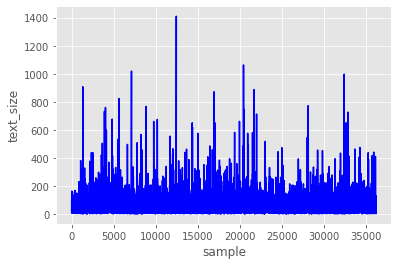

In [77]:
plt.plot(text_size, 'b-', );
plt.xlabel('sample');
plt.ylabel('text_size');

In [78]:
text_number_word = data_analysis['text_number_word']
print('text_number_word_min: ',text_number_word.min(),'index:',text_number_word.argmin())
print('Text Transcript:', data_analysis['text_transcript'][text_number_word.argmin()])
print('text_number_word_max: ' ,text_number_word.max(),'index:',text_number_word.argmax())
print('text_number_word_mean: ',round(text_number_word.mean()))

text_number_word_min:  1 index: 42
Text Transcript: Ripcurl
text_number_word_max:  228 index: 12464
text_number_word_mean:  13


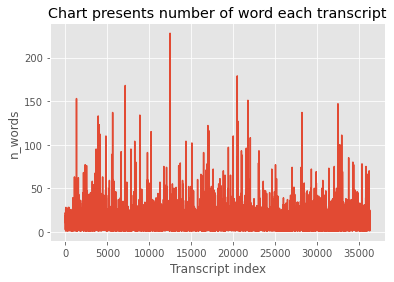

In [79]:
plt.plot(text_number_word, '-', );
plt.xlabel('Transcript index');
plt.ylabel('n_words');
plt.title('Chart presents number of word each transcript');

In [80]:
text_check_digit = data_analysis['text_check_digit']
print('count texts have digit: ',text_check_digit.sum())

count texts have digit:  3454


In [81]:
text_check_symbol = data_analysis['text_check_symbol']
print('count texts have symbol: ',text_check_symbol.sum())

count texts have symbol:  6840


In [82]:
def check_n_sgn_in_transcipts(submission_df):
  n_sgn_trn = 0
  n_sgn_trn_dct = {'index': [], 'transcript_sgn': [], 'sgn': []}
 
  chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\$\'\&]'
  pattern = re.compile(chars_to_ignore_regex)
  
  def check_sgn(txt):
    return re.search(pattern, txt)
 
  for ix, trans in enumerate(submission_df['text_transcript']):
    rs = check_sgn(trans)
    if rs is not None:
      n_sgn_trn += 1
      n_sgn_trn_dct['index'].append(ix)
      n_sgn_trn_dct['transcript_sgn'].append(trans)
      n_sgn_trn_dct['sgn'].append(rs.group(0))
    else:
      n_sgn_trn_dct['index'].append(ix)
      n_sgn_trn_dct['transcript_sgn'].append(None)
      n_sgn_trn_dct['sgn'].append(None)
 
  return n_sgn_trn, n_sgn_trn_dct

In [83]:
n_sgn_trn, n_sgn_trn_dct = check_n_sgn_in_transcipts(data_analysis)
print("Number of sample which have sign in transcript: ", n_sgn_trn)
# if n_sgn_trn > 0:
#   key, trns, sgns =  n_sgn_trn_dct.values()
#   for k, v, sgn in zip(key, trns, sgns):
#     print(k, sgn, v)
sgn_match_lst = n_sgn_trn_dct['sgn']
sgn_match = set(sgn_match_lst)
 
print(f"Number of signs matched: {len(sgn_match)} => Signs: {sgn_match}")
for sgn in list(sgn_match):
  sgn_cnt = sgn_match_lst.count(sgn)
  print(f"Number of sign <{sgn}>: ", sgn_cnt)

Number of sample which have sign in transcript:  6840
Number of signs matched: 6 => Signs: {"'", '.', '&', '-', None, '$'}
Number of sign <'>:  163
Number of sign <.>:  103
Number of sign <&>:  4
Number of sign <->:  6549
Number of sign <None>:  29415
Number of sign <$>:  21


In [49]:
import seaborn as sns

5.15
6.55
1.3999999999999995
3.050000000000001
7.25
36255
33552


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


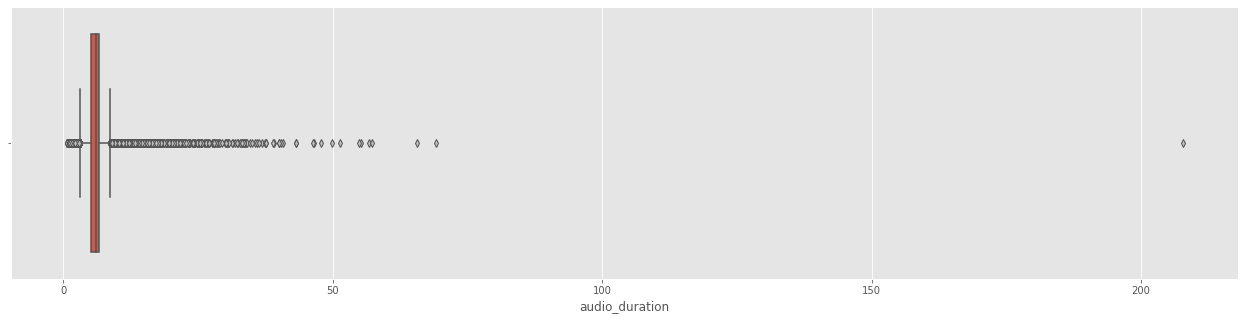

In [84]:
Q1 = audio_duration.quantile(0.25)
Q3 = audio_duration.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)    #IQR is interquartile range. 
print(IQR)
filter = (audio_duration >= Q1 - 1.5 * IQR) & (audio_duration <= Q3 + 1.5 *IQR)

print(Q1 - 1.5 * IQR)
print(Q1 + 1.5 * IQR)
print(len(audio_duration))
dura_df = audio_duration.loc[filter] 
print(len(dura_df))
plt.figure(figsize=(22,5))
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
sns.boxplot(audio_duration, flierprops=flierprops)
plt.show()

#Processing Data

In [54]:
data_csv  = pd.read_csv("outpart3.csv")

In [55]:
data_csv.head()

,ID,sample_name,wav_format,audio_size,audio_array_size,audio_duration,audio_sampling_rate,text_size,text_transcript,text_number_word,text_check_digit,text_check_symbol
0,0,output-wav/f3wav00000.wav,<class 'numpy.int16'>,199,99776,6.24,16000,102,dia macam pelik Gilalah dia kata kenapa kau na...,20,0,0
1,1,output-wav/f3wav00001.wav,<class 'numpy.int16'>,198,99440,6.21,16000,17,background dragon,2,0,0
2,2,output-wav/f3wav00002.wav,<class 'numpy.int16'>,144,72112,4.51,16000,85,perut bapa haruan iaitu norazwan Mukhriz dia t...,12,0,0
3,3,output-wav/f3wav00003.wav,<class 'numpy.int16'>,88,44464,2.78,16000,43,kita nampak berdasarkan siapa kita hari ini,7,0,0
4,4,output-wav/f3wav00004.wav,<class 'numpy.int16'>,184,92464,5.78,16000,20,tak buat ucapan 2019,4,1,0


In [56]:
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\$\'\&]'
pattern = re.compile(chars_to_ignore_regex)
  
def check_sgn(txt):
  return re.search(pattern, txt)
def has_digit(inputString):
  return re.search(r'\d', inputString)

In [57]:
data_dict = []

for i in range (len(data_csv)):
  if i%1000 ==0:
    print('index:',i)
  sample_dict = {}
  sample = data_csv.iloc[i]['sample_name']
  text = data_csv.iloc[i]['text_transcript']
  duration = data_csv.iloc[i]['audio_duration']
  count_word = 0
  if duration >=1.0 and duration <=20.0:

    if check_sgn(text) is not None:
      check_symbol = 1
      text = text.replace("-", " ")
      text = text.replace(".", " ")
      text = text.replace("'", "")
      text = text.replace("&", " dan ")
    
    text.replace("  ", " ")
    sample_dict['path'] = "waves/"+sample
    sample_dict['transcript'] = text

    data_dict.append(sample_dict)

index: 0
index: 1000
index: 2000
index: 3000
index: 4000
index: 5000
index: 6000
index: 7000
index: 8000
index: 9000
index: 10000
index: 11000
index: 12000
index: 13000
index: 14000
index: 15000
index: 16000
index: 17000
index: 18000
index: 19000
index: 20000
index: 21000
index: 22000
index: 23000
index: 24000
index: 25000
index: 26000
index: 27000
index: 28000
index: 29000
index: 30000
index: 31000
index: 32000
index: 33000
index: 34000
index: 35000
index: 36000


In [58]:
df = pd.DataFrame({'path':[i['path'] for i in data_dict],
                  'transcript': [i['transcript'] for i in data_dict]})

In [59]:
df.to_csv('annotationpart3.csv',index=False)

In [63]:
data_proc = pd.read_csv('annotationpart3.csv')

In [60]:
def check_n_sgn_in_transcipts(submission_df):
  n_sgn_trn = 0
  n_sgn_trn_dct = {'index': [], 'transcript_sgn': [], 'sgn': []}
 
  chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\$\'\&]'
  pattern = re.compile(chars_to_ignore_regex)
  
  def check_sgn(txt):
    return re.search(pattern, txt)
 
  for ix, trans in enumerate(submission_df['transcript']):
    rs = check_sgn(trans)
    if rs is not None:
      n_sgn_trn += 1
      n_sgn_trn_dct['index'].append(ix)
      n_sgn_trn_dct['transcript_sgn'].append(trans)
      n_sgn_trn_dct['sgn'].append(rs.group(0))
    else:
      n_sgn_trn_dct['index'].append(ix)
      n_sgn_trn_dct['transcript_sgn'].append(None)
      n_sgn_trn_dct['sgn'].append(None)
 
  return n_sgn_trn, n_sgn_trn_dct

In [64]:
n_sgn_trn, n_sgn_trn_dct = check_n_sgn_in_transcipts(data_proc)
print("Number of sample which have sign in transcript: ", n_sgn_trn)
# if n_sgn_trn > 0:
#   key, trns, sgns =  n_sgn_trn_dct.values()
#   for k, v, sgn in zip(key, trns, sgns):
#     print(k, sgn, v)
sgn_match_lst = n_sgn_trn_dct['sgn']
sgn_match = set(sgn_match_lst)
 
print(f"Number of signs matched: {len(sgn_match)} => Signs: {sgn_match}")
for sgn in list(sgn_match):
  sgn_cnt = sgn_match_lst.count(sgn)
  print(f"Number of sign <{sgn}>: ", sgn_cnt)

Number of sample which have sign in transcript:  0
Number of signs matched: 1 => Signs: {None}
Number of sign <None>:  36071
